In [ ]:
#Import necessary libraries
import numpy as np
import scipy as sc

In [ ]:
#Define the coefficient matrix A
A = np.array([[1,3,5],[2,5,1],[2,3,8]])

In [ ]:
print(A)

[[1 3 5]
 [2 5 1]
 [2 3 8]]


In [ ]:
#Define the right-hand side vector b
b = np.array([[10],[8],[3]])

In [ ]:
print(b)

[[10]
 [ 8]
 [ 3]]


In [ ]:
#Calculate the inverse of A and multiply by b to find the solution vector
C = sc.linalg.inv(A).dot(b)

In [ ]:
print(C)

[[-9.28]
 [ 5.16]
 [ 0.76]]


In [ ]:
#Alternatively, use the solve function to find the solution vector directly
D = sc.linalg.solve(A,b)

In [ ]:
print(D)

[[-9.28]
 [ 5.16]
 [ 0.76]]


In [ ]:
import numpy as np
from scipy.linalg import solve

In [ ]:
A = np.array([[3,2], [1,2]])
b = np.array([1,0])
solution = solve(A,b)
print(solution)

[ 0.5  -0.25]


In [ ]:
# Python program to implement Runge Kutta method
# A sample differential equation "dy/dx = (x-y)/2"
def dydx (x,y):
  return((x-y)/2)

In [ ]:
#Finds value of y for a given x using step size h
# and initial value y0 at x0
def rungeKutta(x0, y0, x, h):
  n = int((x-x0)/h)
  y = y0
  for i in range(1, n+1):
    k1 = h * dydx(x0, y)
    k2 = h * dydx(x0 + 0.5*h, y + 0.5*k1)
    k3 = h * dydx(x0 + 0.5*h, y + 0.5*k2)
    k4 = h * dydx(x0 + h, y + k3)

    y = y + (1.0/ 6.0)*(k1 + 2*k2 + 2*k3 + k4)

    x0 = x0 + h
  return y
x0 = 0
y = 1
x = 5
h = 0.2
print('The value of y at x is:', rungeKutta(x0, y, x, h))

The value of y at x is: 3.246255553543053


In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [4]:
V = 1154 # m3
R = 8.314 # R[J/(mol*K)]
T = 120 # °C

mass_in = 473220 # kg/hr
MW_in = 56.6
mass_out = 28742 # kg/hr
MW_out = 40.4

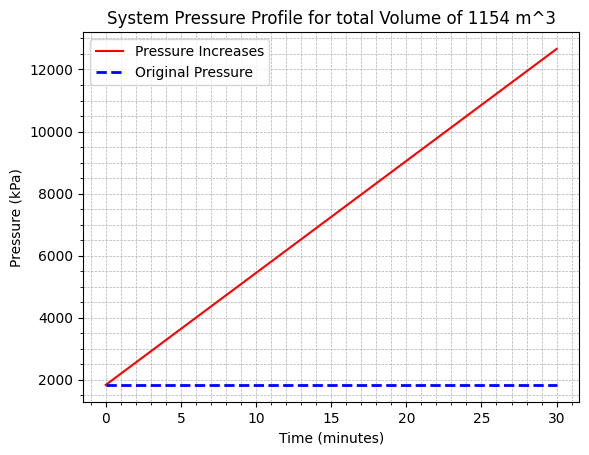

In [5]:
# calculation, time in minutes
Tk = T + 273.15 # Convert to Kelvin
mol_in = mass_in/MW_in/60 # kmol/min
mol_out = mass_out/MW_out/60 # kmol/min

# initial condition
P0 = 1830 # kPa


# differential equation using ideal gas
def dPdt(P, t):
    # the differential equations
    dpdt = (mol_in - mol_out)/(V/(R*Tk))

    return dpdt


# create the x axis for the integration
# time to response is 20 minutes
start = 0
end = 30
t = np.linspace(start, end, end)

Pinitial = np.linspace(P0, P0, end)

# integration of the differential equation
P = sc.integrate.odeint(dPdt, P0, t)


# Plotting the results
plt.figure()
plt.plot(t, P, 'r', label='Pressure Increases')
plt.plot(t, Pinitial, 'b--', label='Original Pressure', linewidth=2)
plt.title(f'System Pressure Profile for total Volume of {V} m^3')
plt.xlabel('Time (minutes)')
plt.ylabel('Pressure (kPa)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend()
plt.show()